In [1]:
import os
import glob
from natsort import natsorted
from lucifex.io import filter_by_parameters
from lucifex.viz import save_figure

data_dir = 'data/convection_reaction'
paths = natsorted(glob.glob(f'./{data_dir}/*/'))

subset = filter_by_parameters(paths, dict(Ra=500, Sr=0.1), exceptions=(NameError, ))
subset
    
path = paths[15]
path

'./data/convection_reaction/Ra=500_Da=1000_Sr=0.1_h0=0.9__2025-04-22_23-38-56.701272/'

In [2]:
from lucifex.io import load_mesh, load_constant_series, load_function_series
from lucifex.utils import grid

mesh = load_mesh('LxLy', path, 'FunctionSeries')
mC = load_constant_series('Mc', path, 'ConstantSeries', mesh, (2,))
mD = load_constant_series('Md', path, 'ConstantSeries', mesh)
c = load_function_series('c', path, 'FunctionSeries', mesh, ('P', 1))
c_grid = [grid(i) for i in c.series]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


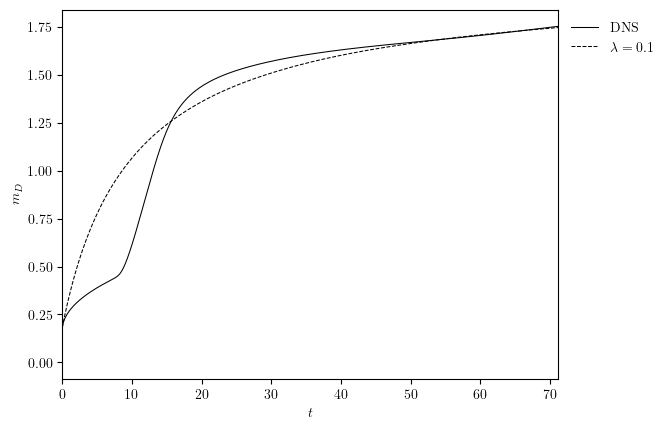

In [ ]:
%load_ext autoreload

%autoreload 2

import numpy as np
from lucifex.viz import plot_line
from formulae.derived import (SharpFrontModel, mass_model_solver, flux_scaling)

Lx = 2.0
sr = 0.1
h0 = 0.9
epsilon = 0.01
lmbda = 0.1

t = mD.time_series

model = mass_model_solver(SharpFrontModel, flux_scaling, Sr, h0, epsilon)(t, lmbda=lmbda, exponent=2)

fig, ax = plot_line([(t, mD.value_series), (t, Lx * model.mD)], 't', 'm_D', 
                        legend_labels=('DNS', f'$\lambda={lmbda}$'))

In [ ]:
from formulae.derived import horizontal_average

x, y = grid (c.mesh)
cbar_series = [horizontal_average(i) for i in c_grid]

(0.0, 1.0)

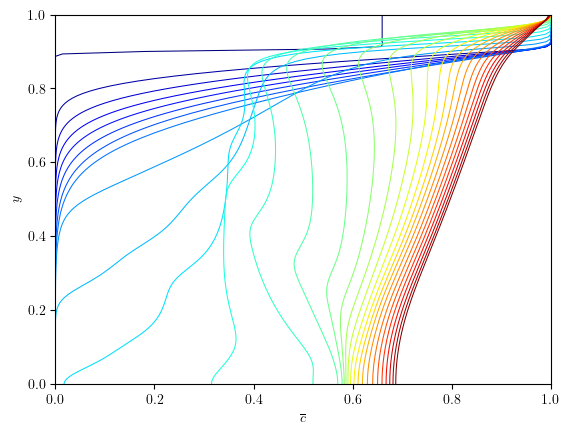

In [56]:
time_indices = np.arange(1, 3000, 100)

fig, ax = plot_line([(cbar_series[i], y) for i in time_indices], '\overline{c}', 'y', 
                    cycler='spectrum')#, legend_labels=[c.time_series[i] for i in time_indices],
                    #legend_title='t',)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

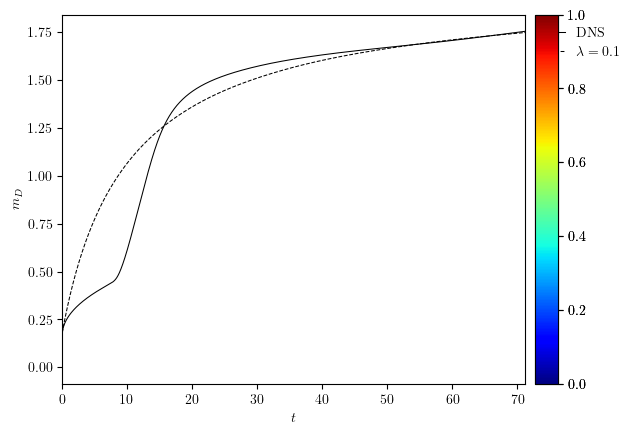

In [62]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

sm = plt.cm.ScalarMappable(cmap=plt.cm.jet, norm=plt.Normalize(vmin=0, vmax=1))
divider = make_axes_locatable(ax)
ax_cbar = divider.append_axes("right", size="5%", pad=0.1)
cbar = fig.colorbar(sm, ax_cbar, shrink=0.5)
# cbar.set_label('$t$', rotation=360)

fig

In [ ]:
import numpy as np
from lucifex.viz import plot_line, plot_colormap 

xaxis, yaxis = grid(mesh)

for time_index in (500, 750, 1000, 1100, 1250, 1500, 2000, 2500, 3000):
    ci = c_grid[time_index]
    cbar = np.mean(ci, axis=0)
    fig, ax = plot_line((cbar, yaxis), '\overline{c}', 'y', title=f't={c.time_series[time_index]}')
    cmap = plot_colormap((ci, xaxis, yaxis))
    ax.hlines([0.9], np.min(yaxis), np.max(yaxis), colors='black', linestyles='dotted')

In [57]:
dtCFL = load_constant_series('dtCFL', path, 'ConstantSeries', mesh)
dtK = load_constant_series('dtK', path, 'ConstantSeries', mesh)

(<Figure size 640x480 with 1 Axes>, <Axes: >)

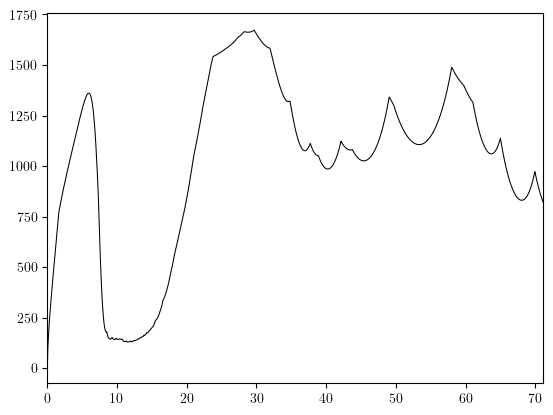

In [59]:
plot_line((dtK.time_series, dtK.value_series))

(0.0, 0.1)

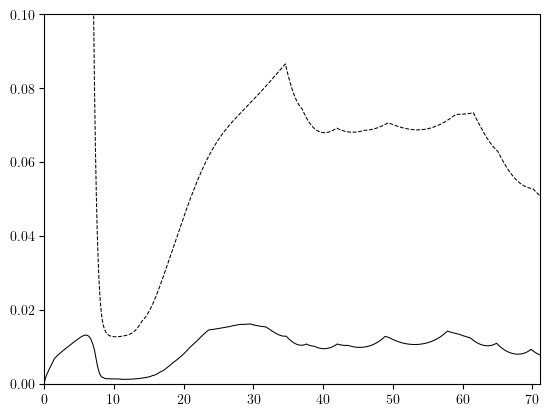

In [64]:
fig, ax = plot_line([(dt.time_series, dt.value_series), (dtCFL.time_series, dtCFL.value_series), (dtK.time_series, dtK.value_series)])
ax.set_ylim(0, 0.1)

In [46]:
dt = load_constant_series('dt', path, 'ConstantSeries', mesh)

In [49]:
umax = load_constant_series('umax', path, 'ConstantSeries', mesh)

(<Figure size 640x480 with 1 Axes>, <Axes: >)

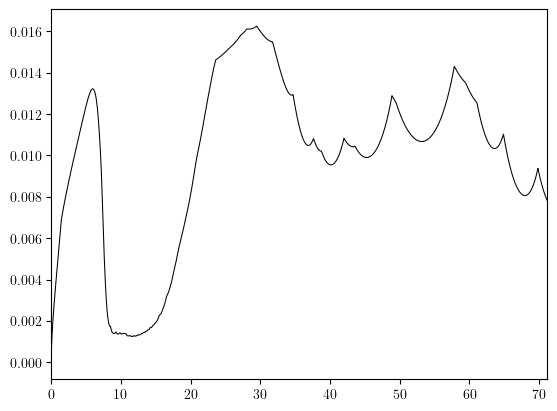

In [53]:
plot_line((dt.time_series, dt.value_series))

(<Figure size 640x480 with 1 Axes>, <Axes: >)

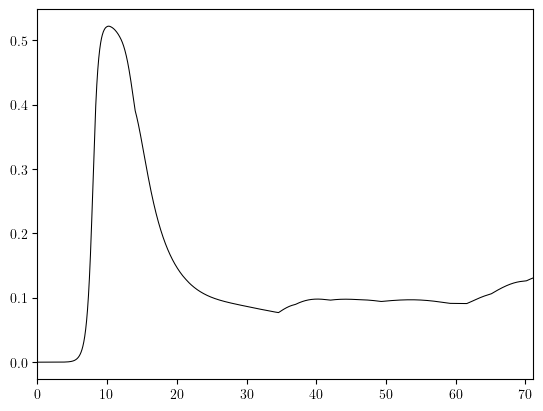

In [52]:
plot_line((umax.time_series, umax.value_series))